In [1]:
# generic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# notebook settings
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2 
# precision and plot settings
num_precision = 3
np.set_printoptions(precision=num_precision, suppress=True)
pd.set_option('display.float_format', lambda x: f'{x:,.{num_precision}f}')
pd.set_option("display.precision", num_precision)
pd.set_option('display.max_columns', None)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

In [2]:
import sys, os
from skimage import io
import shutil
from skimage.filters import sobel

In [4]:
# will try to sort images based on pixel variation or sobel filters
directory = '../data/sat_images/test_filtering/'

In [444]:
def check_imgs(directory, exclude_dir, sobel_dir):
    counter = 0
    sb_count = 0
    filedict = {}
    # make list of files with name and path in dict
    for root_path, dirs, files in os.walk(directory, followlinks=False):
        for file in files:
            if file.endswith(".png"):
                filedict[file] = str(os.path.join(root_path, file))
    # now go through files
    for file, filepath in filedict.items():
                image = io.imread(filepath)
                pixel_range = []
                for channel in range(3):
                    pixel_range.append(image[:,:,channel].std())
                # if all channels have a small range, exclude file
                if np.all(np.array(pixel_range) < 10):
                    print(f'excluding: {file}')
                    print(os.path.join(exclude_dir + os.sep + file))
                    # move file
                    shutil.move(filepath, os.path.join(exclude_dir + os.sep + file)) #, symlinks=False)
                    # os.rename(filepath, os.path.join(exclude_dir + os.sep + file))  
                    counter += 1
# #                 else:
# #                     continue
# #     #                 image_sb = sobel_image(image).astype('uint8')
# #     #                 sb_filename = os.path.join(sobel_dir, file)
# #     #                 io.imsave(sb_filename, image_sb, check_contrast=False)
# #     #                 sb_count += 1
    print(f'{counter} files were excluded and moved.')
    print(f'{sb_count} files were saved as sobeled.')
    return filedict

In [437]:
# directory = '/Users/pault/Desktop/github/CampsitePredict/data/img_testing/test_filtering'
directory = '../data/img_testing/test_filtering'
exclude_dir = '../data/sat_images/excluded'
sobel_dir = '/Users/pault/Desktop/github/CampsitePredict/data/sat_images/sobeled'

In [ ]:
filedict = check_imgs(directory, exclude_dir, sobel_dir)
filedict # numpy.any(a, axis=None, out=None, keepdims=<no value>

In [445]:
# now test with entire test
directory = '../data/sat_images/'
# filedict = check_imgs(directory, exclude_dir, sobel_dir)
# filedict

excluding: satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582_rot180.png
../data/sat_images/excluded/satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582_rot180.png
excluding: satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582_rot90.png
../data/sat_images/excluded/satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582_rot90.png
excluding: satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582.png
../data/sat_images/excluded/satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582.png
excluding: satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582_rot270.png
../data/sat_images/excluded/satimg_AK_29_Informal Campsite_closed_17_62.665397_-144.42582_rot270.png
excluding: satimg_AK_7595_Informal Campsite_17_63.092436_-145.633454.png
../data/sat_images/excluded/satimg_AK_7595_Informal Campsite_17_63.092436_-145.633454.png
excluding: satimg_AK_12080_Informal Campsite_17_63.041185_-146.882212_rot90.png
../data/sat_images/excluded/satim

excluding: satimg_AK_7068_Wild Camping_17_59.366214_-136.3424_rot270.png
../data/sat_images/excluded/satimg_AK_7068_Wild Camping_17_59.366214_-136.3424_rot270.png
excluding: satimg_AK_11366_Wild Camping_17_63.24149499999999_-147.794144_rot90.png
../data/sat_images/excluded/satimg_AK_11366_Wild Camping_17_63.24149499999999_-147.794144_rot90.png
excluding: satimg_AK_11169_Wild Camping_17_63.105738_-146.65536799999995_rot180.png
../data/sat_images/excluded/satimg_AK_11169_Wild Camping_17_63.105738_-146.65536799999995_rot180.png
excluding: satimg_AK_6948_Wild Camping_17_64.94502299999999_-146.25188500000004_rot90.png
../data/sat_images/excluded/satimg_AK_6948_Wild Camping_17_64.94502299999999_-146.25188500000004_rot90.png
excluding: satimg_AK_11548_Wild Camping_17_62.651153_-144.501312_rot90.png
../data/sat_images/excluded/satimg_AK_11548_Wild Camping_17_62.651153_-144.501312_rot90.png
excluding: satimg_AK_11368_Wild Camping_17_61.151830000000004_-145.72701.png
../data/sat_images/excluded/

excluding: satimg_AK_4989_Wild Camping_17_63.098330000000004_-145.618808_rot180.png
../data/sat_images/excluded/satimg_AK_4989_Wild Camping_17_63.098330000000004_-145.618808_rot180.png
excluding: satimg_AK_4989_Wild Camping_17_63.098330000000004_-145.618808.png
../data/sat_images/excluded/satimg_AK_4989_Wild Camping_17_63.098330000000004_-145.618808.png
excluding: satimg_AK_7790_Wild Camping_17_64.934671_-146.28358500000004_rot180.png
../data/sat_images/excluded/satimg_AK_7790_Wild Camping_17_64.934671_-146.28358500000004_rot180.png
excluding: satimg_AK_10679_Wild Camping_17_65.489469_-148.65511_rot270.png
../data/sat_images/excluded/satimg_AK_10679_Wild Camping_17_65.489469_-148.65511_rot270.png
excluding: satimg_AK_11548_Wild Camping_17_62.651153_-144.501312.png
../data/sat_images/excluded/satimg_AK_11548_Wild Camping_17_62.651153_-144.501312.png
excluding: satimg_AK_11499_Wild Camping_17_63.364402_-148.356358_rot270.png
../data/sat_images/excluded/satimg_AK_11499_Wild Camping_17_63.

excluding: satimg_CO__39_Informal Campsite_17_38.26762_-103.70542_rot90.png
../data/sat_images/excluded/satimg_CO__39_Informal Campsite_17_38.26762_-103.70542_rot90.png
excluding: satimg_CO__38_Wild Camping_17_38.19099_-103.71048.png
../data/sat_images/excluded/satimg_CO__38_Wild Camping_17_38.19099_-103.71048.png
excluding: satimg_CO__29_Wild Camping_17_38.612513_-109.02324_rot180.png
../data/sat_images/excluded/satimg_CO__29_Wild Camping_17_38.612513_-109.02324_rot180.png
excluding: satimg_CO__38_Wild Camping_17_38.19099_-103.71048_rot180.png
../data/sat_images/excluded/satimg_CO__38_Wild Camping_17_38.19099_-103.71048_rot180.png
excluding: satimg_CO__29_Wild Camping_17_38.612513_-109.02324.png
../data/sat_images/excluded/satimg_CO__29_Wild Camping_17_38.612513_-109.02324.png
excluding: satimg_CO__38_Wild Camping_17_38.19099_-103.71048_rot270.png
../data/sat_images/excluded/satimg_CO__38_Wild Camping_17_38.19099_-103.71048_rot270.png
excluding: satimg_CO__29_Wild Camping_17_38.612513

excluding: satimg_NV_8899_Wild Camping_17_36.476315_-115.365435_rot270.png
../data/sat_images/excluded/satimg_NV_8899_Wild Camping_17_36.476315_-115.365435_rot270.png
excluding: satimg_NV_9426_Wild Camping_17_35.881396_-114.93588600000001_rot270.png
../data/sat_images/excluded/satimg_NV_9426_Wild Camping_17_35.881396_-114.93588600000001_rot270.png
excluding: satimg_AR_105_Established Campground_17_35.131063_-90.160783_rot180.png
../data/sat_images/excluded/satimg_AR_105_Established Campground_17_35.131063_-90.160783_rot180.png
excluding: satimg_AR_105_Established Campground_17_35.131063_-90.160783_rot90.png
../data/sat_images/excluded/satimg_AR_105_Established Campground_17_35.131063_-90.160783_rot90.png
excluding: satimg_AR_105_Established Campground_17_35.131063_-90.160783.png
../data/sat_images/excluded/satimg_AR_105_Established Campground_17_35.131063_-90.160783.png
excluding: satimg_AR_105_Established Campground_17_35.131063_-90.160783_rot270.png
../data/sat_images/excluded/satimg

In [244]:
from PIL import Image
import imageio

In [275]:
def sobel_imgs(directory, sobel_dir):
    sb_count = 0
    filedict = {}
    dirlist = []
    # make list of files with name and path in dict
    for root_path, dirs, files in os.walk(directory, followlinks=False):
        for dir_ in dirs:
            dirlist.append(dir_)
        for file in files:
            if file.endswith(".png"):
                filedict[file] = str(os.path.join(root_path, file))
    # now go through files
    for file, filepath in filedict.items():
        image = io.imread(filepath)
        image_sb = sobel_image(image).astype('uint8')
        # each channel separately
#         fig, axs = plt.subplots(1, 4, figsize=(20,8))
#         axs[0].imshow(image_sb[:,:,0], cmap='Greys')
#         axs[1].imshow(image_sb[:,:,1], cmap='Greys')
#         axs[2].imshow(image_sb[:,:,2], cmap='Greys')
#         axs[3].imshow(image)
#         plt.show()
        # create subdir path for each file
        parent = os.path.basename(os.path.dirname(os.path.dirname(filepath)))
        subdir = os.path.basename(os.path.dirname(filepath))
        fullparent = os.path.join(sobel_dir + os.sep + parent + os.sep + subdir)
        sb_filename = os.path.join(fullparent + os.sep + file)
        # need to be able to create dir if doesn't exist to keep files in cat dirs
        if not os.path.isdir(fullparent):
            os.makedirs(fullparent)
        # save file
        io.imsave(sb_filename, image_sb, check_contrast=False)
        sb_count += 1
        
    print(f'{sb_count} files were saved as sobeled.')
    return filedict, dirlist

In [276]:
def sobel_image(image):
    '''
    get img gradients for image
    '''
    ### drop alpha
    image = image[:,:,:3]
    # get gradients
#     sobel_mag = np.sqrt(sum([sobel(image, axis=i)**2 for i in range(image.ndim)]) / image.ndim)
#     sobel_mag *= 255.0 / np.max(sobel_mag)  # normalize (Q&D)
    
    #### with things spelled out
    dx = sobel(image, axis=0)  # horizontal derivative
    dy = sobel(image, axis=1)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.max(mag) # normalize
#     mag *= 10.0 / np.max(mag) # tone it down
    sobel_mag = mag
    # put alpha back as 255
    alpha = np.ones((test.shape[0], test.shape[1]))*255
    rgba = np.dstack( (sobel_mag, alpha) )
    return rgba

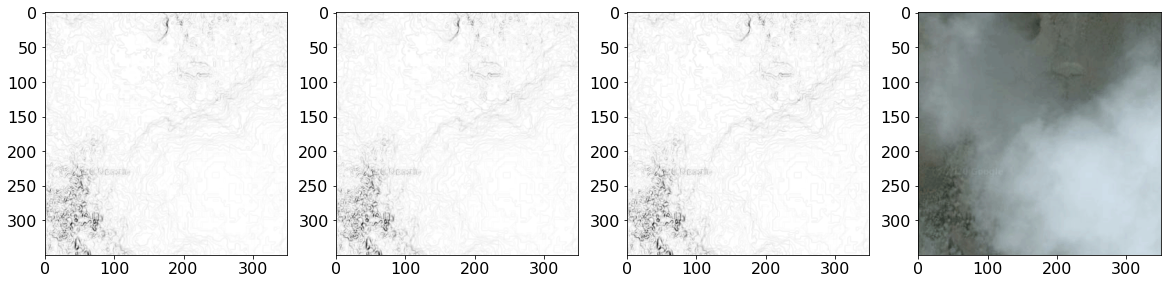

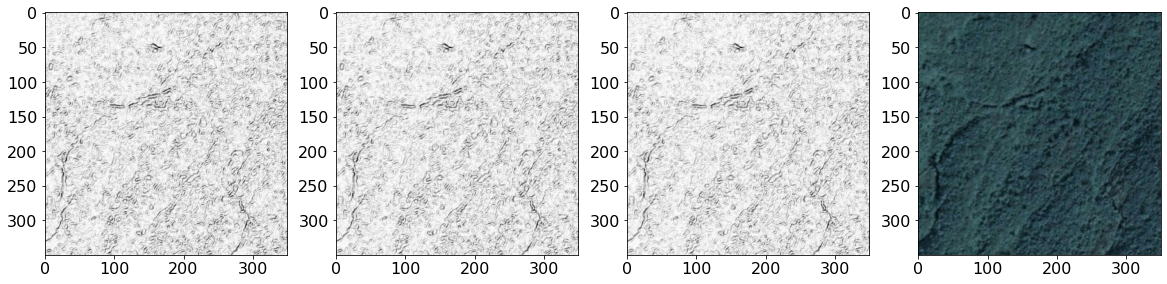

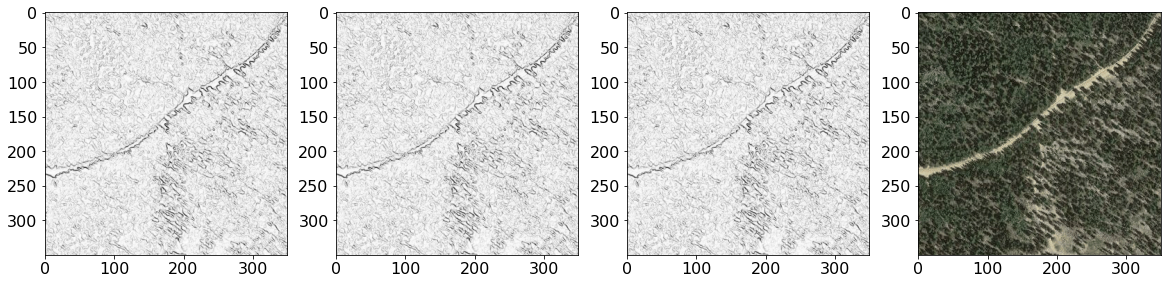

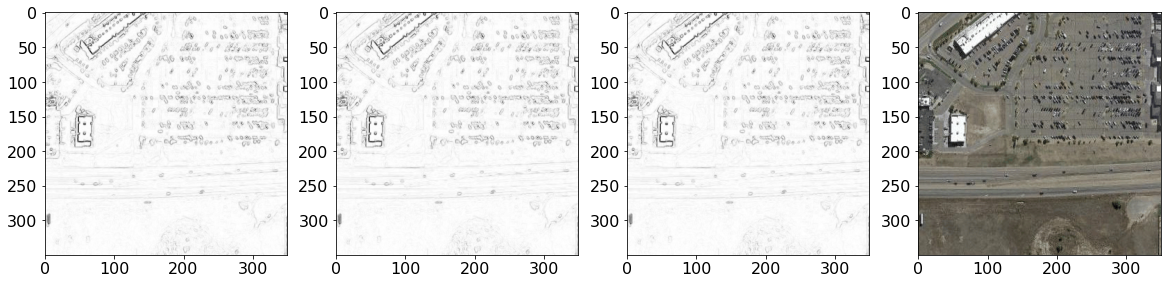

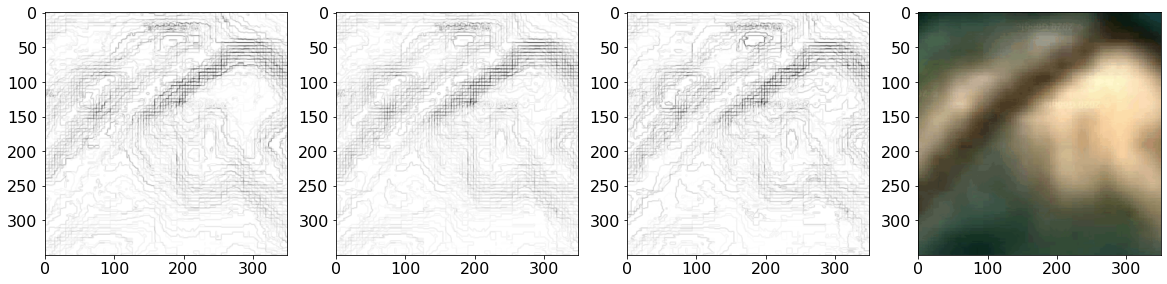

5 files were saved as sobeled.


In [277]:
# test it
directory = '../data/img_testing/test_filtering'
sobel_dir = '../data/sat_images/sobeled'
filedict, dirlist = sobel_imgs(directory, sobel_dir)

In [260]:
# do all
directory = '../data/sat_images/'
sobel_dir = '../data/sat_images/sobeled'
filedict, dirlist = sobel_imgs(directory, sobel_dir)